In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train[10]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5341 - acc: 0.7915 - val_loss: 0.4072 - val_acc: 0.8718
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3289 - acc: 0.9005 - val_loss: 0.3181 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2390 - acc: 0.9251 - val_loss: 0.2979 - val_acc: 0.8822
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1880 - acc: 0.9415 - val_loss: 0.3072 - val_acc: 0.8761
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1575 - acc: 0.9505 - val_loss: 0.2753 - val_acc: 0.8901
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1288 - acc: 0.9608 - val_loss: 0.3027 - val_acc: 0.8804
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1077 - acc: 0.9693 - val_loss: 0.3000 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0917 - a

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

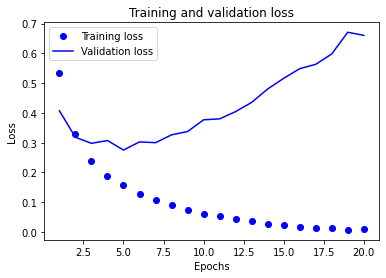

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

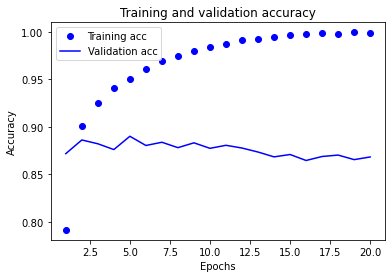

In [13]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7255 - acc: 0.8522


In [15]:
results

[0.7255263924598694, 0.8522400259971619]

In [16]:
model.predict(x_test)

array([[0.00847518],
       [1.        ],
       [0.97836936],
       ...,
       [0.00451279],
       [0.02623466],
       [0.55905735]], dtype=float32)